## Loading neural data
This notebook shows how to load the neural data and select data for each visual area. It also visualizes the split-half reliability of the units in each dataset.

Note that you will have to change the directories: `BASE_DIR` and `TORCH_HOME`

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from mouse_vision.core.default_dirs import NEUROPIX_DATA_PATH_WITH_RELS, CALCIUM_DATA_PATH_WITH_RELS
from mouse_vision.core.utils import open_dataset
from mouse_vision.core.constants import VISUAL_AREAS, NUM_TIMEPOINTS, VISUAL_AREA_COLOR_MAP

### Neuropixels

In [2]:
def plot_reliability_neuropixels(neural_data, visual_areas=VISUAL_AREAS, fraction_of_max=False):    
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    
    time = np.arange(0, NUM_TIMEPOINTS * 10, 10)
    for v in visual_areas:
        reliabilities = neural_data.sel(visual_area=v).splithalf_r_mean
        
        median = np.nanmedian(reliabilities, axis=1)
        if fraction_of_max:
            median = median / np.max(median)
        
        sem = stats.sem(reliabilities, axis=1, nan_policy="omit")
        
        ax.fill_between(time, median + sem, median - sem, label=v, alpha=0.8, color=VISUAL_AREA_COLOR_MAP[v])
    
    if fraction_of_max:
        ax.set_ylabel("Fraction of Maximum Split-half Reliability (Pearson's R)")
    else:    
        ax.set_ylabel("Split-half Reliability (Pearson's R)")
        
    ax.set_xlabel("Time (ms)")
    ax.legend(loc="upper left", frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xticks(np.arange(0, NUM_TIMEPOINTS * 10, 40))

#### A) Load dataset

In [3]:
np_data = open_dataset(NEUROPIX_DATA_PATH_WITH_RELS)
print(np_data.keys())

dict_keys(['stimuli', 'neural_data'])


#### B) Stimuli: 118 images of dimensions (918, 1174)

(118, 918, 1174)


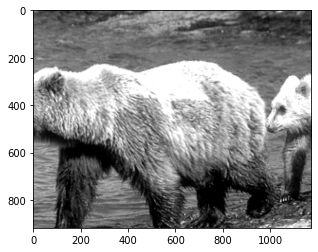

In [4]:
print(np_data["stimuli"].shape)

plt.figure()
plt.imshow(np_data["stimuli"][0], cmap="gray")

#### C) Neural data: 50 trials of 118 images, for 25 time points (10-ms bins) and 8301 units

In [5]:
# All the neural data
print(np_data["neural_data"].shape)

(50, 118, 25, 8301)


In [6]:
# Select neural data based on desired visual area
selected_data = np_data["neural_data"].sel(visual_area="VISal")
print(selected_data.shape)

(50, 118, 25, 1553)


#### D) Reliability

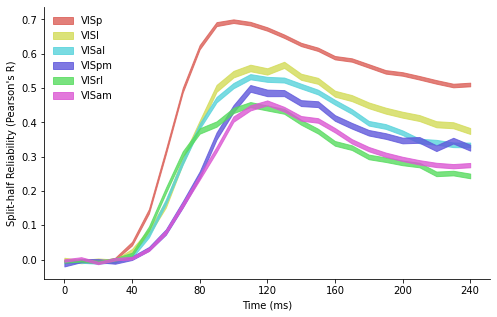

In [7]:
plot_reliability_neuropixels(np_data["neural_data"], visual_areas=VISUAL_AREAS, fraction_of_max=False)

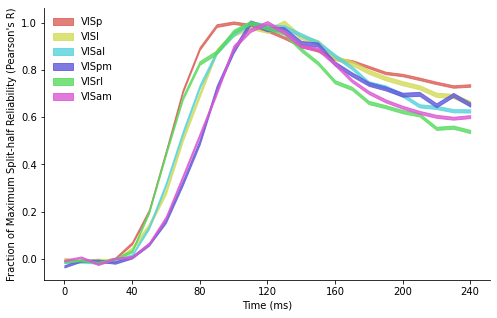

In [8]:
# Plot split-half reliability as a fraction of maximum reliability
plot_reliability_neuropixels(np_data["neural_data"], visual_areas=VISUAL_AREAS, fraction_of_max=True)

### Calcium Imaging

In [9]:
def plot_reliability_calcium(neural_data, xvals=None, xlim=None, yvals=None, visual_areas=VISUAL_AREAS):
    # Plots distribution of split-half reliability across units in each visual area
    
    plt.figure(figsize=(9, 5))
    ax = plt.gca()
    
    for v in visual_areas:
        reliabilities = neural_data.sel(visual_area=v).reliability_mean            
        ax.hist(reliabilities, bins=140, density=True, label=v, alpha=0.5)
    
    ax.set_xlabel("Split-half Reliability (Pearson's R)")
    ax.set_ylabel("Density")
    ax.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    if xvals is not None:
        ax.set_xticks(xvals)

    if yvals is not None:
        ax.set_yticks(yvals)
    
    if xlim is not None:
        ax.set_xlim(xlim)

#### A) Load dataset

In [10]:
calcium_data = open_dataset(CALCIUM_DATA_PATH_WITH_RELS)
print(calcium_data.keys())

dict_keys(['stimuli', 'neural_data'])


#### B) Stimuli: 118 images of dimensions (918 x 1174)

(118, 918, 1174)


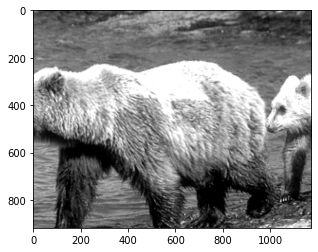

In [11]:
print(calcium_data["stimuli"].shape)

plt.figure()
plt.imshow(calcium_data["stimuli"][0], cmap="gray")

#### C) Neural data: 50 trials of 118 images, for 40064 units

In [12]:
# All the neural data
print(calcium_data["neural_data"].shape)

(50, 118, 40064)


In [13]:
# Select neural data based on desired visual area
selected_data = calcium_data["neural_data"].sel(visual_area="VISal")
print(selected_data.shape)

(50, 118, 4485)


#### D) Reliability

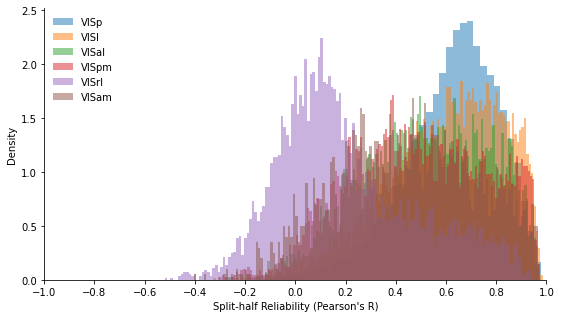

In [14]:
plot_reliability_calcium(
    calcium_data["neural_data"], 
    xvals=[-1.0, -0.8, -0.6, -0.4, -0.2 ,0, 0.2, 0.4, 0.6, 0.8, 1.0], 
    xlim=[-1, 1], 
    yvals=[0, 0.5, 1.0, 1.5, 2, 2.5],
    visual_areas=VISUAL_AREAS,
)